# **PREDICCIÓN DE INCUMPLIMIENTOS DE PAGO EDA-ML**

## **INTRODUCCIÓN**
*Las compañias del sectot financiero, ya sean estas entidades gubernamentales o privadas que realizan prestámos financieros, buscan poder reducir los impagos de los prestamos brindados y asegurar que estos sean pagados dentro de los plazos estipulados, pero, realmente ¿Se puede predecir quienes dejaran de pagar sus prestamos? y la respuesta, es: Sí. Ya que muchas empresas utilizan modelos de  Machine Learning (Aprendizaje Automatico) o Deep Learning (Aprendizaje Profundo) y en base a data historica de clientes se puede predecir quienes presentan mayor riesgo de incumplimiento de un prestamo.*

## **ACERCA DEL DATASET** 
*Este conjunto de datos proviene del "Desafío de predicción de morosidad de préstamos" de Coursera extraido de la plataforma Kaggle (url del Dataset:https://www.kaggle.com/datasets/nikhil1e9/loan-default/data)y en esta oportunidad evaluareamos diferente modelos de Machine Learning para poder predecir mediante una clasificacioón, que clientes presentan mayor riesgo de impago de un prestamo.*

## **OBJETIVOS DEL PROYECTO**
* *EL objetivo principal es construir un modelo de Machine Learnig de clasificación binaria el cual ayude a las entidades financieras en clasificar a un posible cliente que presente incumpliento de pago de su prestamo.*

### **TABLA DE CONTENIDOS**

**LIBRERIAS A USAR EN EL EDA**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

**EXTRACCIÓN DE LA DATA**

In [2]:
df=pd.read_csv(r"E:\FONDO TALENTO DIGITAL\Portafolio_GITHUB\Fraude de pagos\Loan-Default-Prediction-Dataset\Loan_default.csv")

**EXPLORATORY DATA ANALISIS**

In [3]:
df.head(3)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1


In [4]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [5]:
df.shape
print(f"Nuestro Dataset contiene: {df.shape[0]} filas")
print(f"Nuestro Dataset contiene: {df.shape[1]} columnas")

Nuestro Dataset contiene: 255347 filas
Nuestro Dataset contiene: 18 columnas


In [6]:
df.columns
print(f"Las columnas del Dataset son: [{df.columns}]")

Las columnas del Dataset son: [Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')]


**DESCRIPCIÓN DE LAS COLUMNAS**
* 0 - **LoanID** : Identificador unico para cada prestamo
* 1 - **Age**:Edad 
* 2 - **Income** : Ingresos anuales del prestamista 
* 3 - **LoanAmount** : Cantidad de dinero prestado
* 4 - **CreditScore** : El puntaje crediticio del prestatario
* 5 - **MonthsEmployed** : Numero de meses del prestatario ha estado empleado
* 6 - **NumCreditLines** : Numero de cantidad de lienas de credito
* 7 - **InterestRate** : El interes impuesto al prestatario
* 8 - **LoanTerm** : La duracion del prestamo en meses
* 9 - **DTIRatio** : la relación deuda-ingresos, que indica la deuda del prestatario en comparación con sus ingresos
* 10 - **Education** : el nivel más alto de educación alcanzado por el prestatario
* 11 - **EmploymentType** : el tipo de estado laboral del prestatario
* 12 - **MaritalStatus** : el estado civil del prestatario
* 13 - **HasMortgage** : si el prestatario tiene una hipoteca
* 14 - **HasDependents** : si el préstamo tiene dependientes
* 15 - **LoanPurpose** : el propósito del préstamo
* 16 - **HasCoSigner** : si el préstamo tiene un co-firmante
* 17 - **Default (Target)** : La variable objetivo binaria que indica si el préstamo incumplió.

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

**Conclusion inicial del analis exploratorio**
*Observamos que nuestro Dataset contiene 255347 filas unicas sin valores duplicados y que no existen valores nulos dentro de las columnas del Dataset, por otro lado observamos que tenemos caracteristicas unicamente del tipo Object, Int y Float, tambien que nuestra variable objetivo o target es **Default*** 

**ANALISIS DE VARIABLES CATEGORICAS**

In [10]:
cat_columns =df.select_dtypes(exclude=["int64","float64"])
cat_columns.columns

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [11]:
for cat_col in cat_columns:
    print(f"Conteo de valores unicos para la columna'{cat_col}': ")
    print(df[cat_col].value_counts())
    print("."*30)

Conteo de valores unicos para la columna'LoanID': 
LoanID
I38PQUQS96    1
WGB0GD3150    1
XATSFC5YHN    1
CQXDW5VBAG    1
6AIVUNAJG8    1
             ..
ZBK3GDL2LI    1
SP7XY2LPYA    1
Q2DO8ENMV1    1
5EXD8N4MT4    1
ZTH91CGL0B    1
Name: count, Length: 255347, dtype: int64
..............................
Conteo de valores unicos para la columna'Education': 
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
..............................
Conteo de valores unicos para la columna'EmploymentType': 
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
..............................
Conteo de valores unicos para la columna'MaritalStatus': 
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
..............................
Conteo de valores unicos para la columna'HasMortgage': 
HasMortgage
Yes    127677


**VISUALIZACION DE LAS VARIABLES CATEGORICAS**

In [12]:
cat_columns.head()

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,I38PQUQS96,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,HPSK72WA7R,Master's,Full-time,Married,No,No,Other,Yes
2,C1OZ6DPJ8Y,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,V2KKSFM3UN,High School,Full-time,Married,No,No,Business,No
4,EY08JDHTZP,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [13]:
cat_columns.columns

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

**DISTRIBUCION DE LA POBLACION POR EL NIVEL DE ESTUDIO**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17584\3017384783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Education', data=cat_columns,palette=colores)


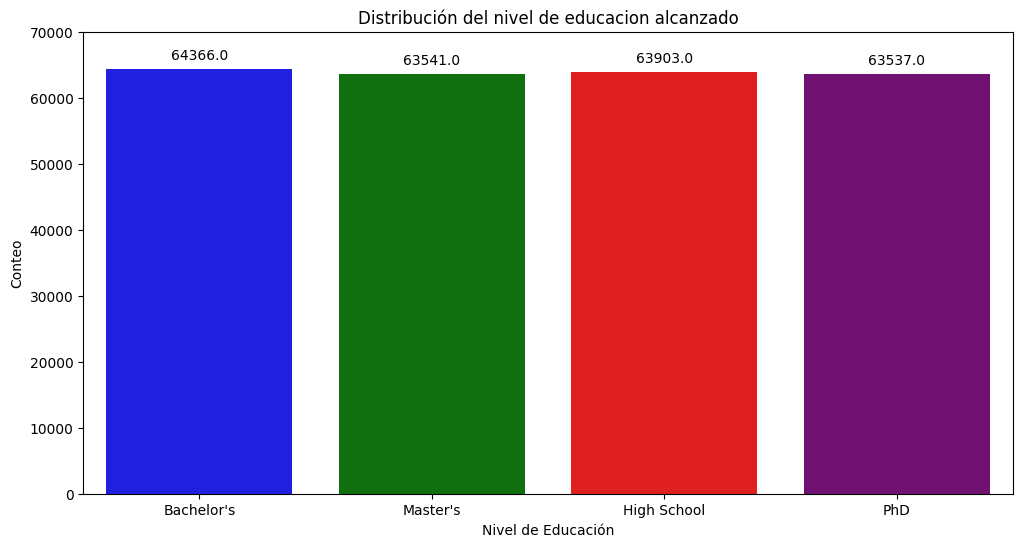

In [14]:

plt.figure(figsize=(12,6))
colores=['blue', 'green', 'red', 'purple']
sns.countplot(x ='Education', data=cat_columns,palette=colores)
plt.title('Distribución del nivel de educacion alcanzado')
plt.xlabel("Nivel de Educación")
plt.ylabel("Conteo")
plt.yticks(range(0,80000,10000))
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), 
                       textcoords='offset points')
plt.show()

**INFERENCIA** : En base al grafico superior inferimos que la poblacion tiene 4 grupos de personas distribuidas por el nivel de estudio alcanzados, los cuales son: Bachelor´s, Master´s, High School, PhD. Los cuales se encuentran distribuidos de forma casi uniforme no presentando una gran diferencia en la cantidad de cada grupo. Por otro lado el grupo de personas que tienen educacion de Bachelor´s es el que presenta ligeramente mayor cantidad en comparación a los demas, por otro lado observando el Dataset no presenta sesgo hacia una categoria en especifico, asi mismo tambien concluimos que los clientes que solicitan los prestamos superaron el nivel de educación desde High School hacia adelante, y tambien puedo inferir que hay menor desigualdad en el acceso a la educación en los clientes de nuestro Dataset.

In [15]:
cat_columns['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

**PORCENTAJE DE DISTRIBUCIÓN DEL PROPOSITO DEL PRESTAMO**

In [16]:
proposito_prestamo = cat_columns['LoanPurpose'].value_counts()

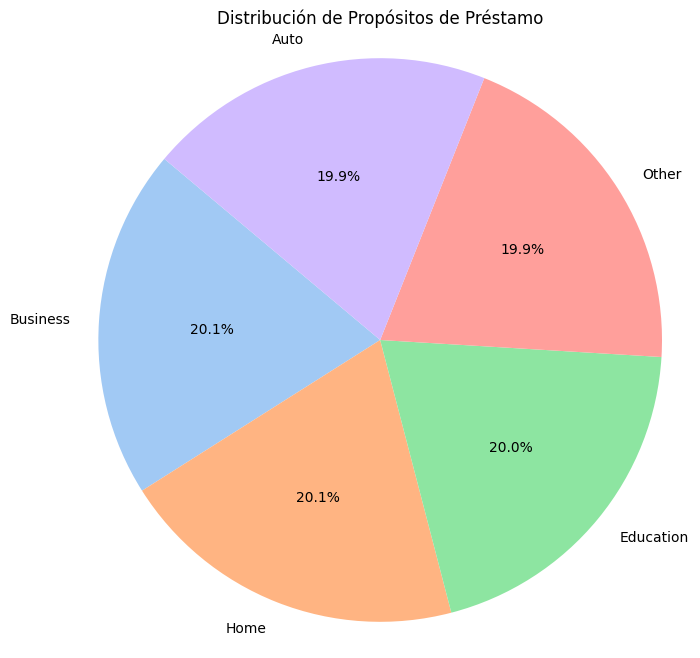

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(proposito_prestamo, labels=proposito_prestamo.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("pastel"))
plt.title('Distribución de Propósitos de Préstamo')
plt.axis('equal') 
plt.show()


**INFERENCIA**: Mediante el grafico inferimos que existen 5 grandes grupos de preferencia del tipo de prestamo los cuales presentan uniformidad en la prederencia del porcentaje del tipo de prestamo, por lo cual, seria adecuado realizar una adecuada distribucion del presupuesto destinado a publicidad en base a estso grupos, por otro lado es recomendable en base a mi criterio poder diseñar una adecuado plan de marketing para cada grupo enfocandose sobre todo en los 4 grupos de preferencia ya establecidos por el publico, los cuales son Business, Home, Education, Auto.  

**ANALISIS DE VARIABLES NUMERICAS**

In [18]:
num_cols =df.select_dtypes(include=['float64','int64'])
num_cols.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

In [19]:
num_cols.shape

(255347, 10)

In [20]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Default         255347 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 19.5 MB


In [21]:
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [22]:
num_cols.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0


**ESTUDIO DE OUTLIERS**

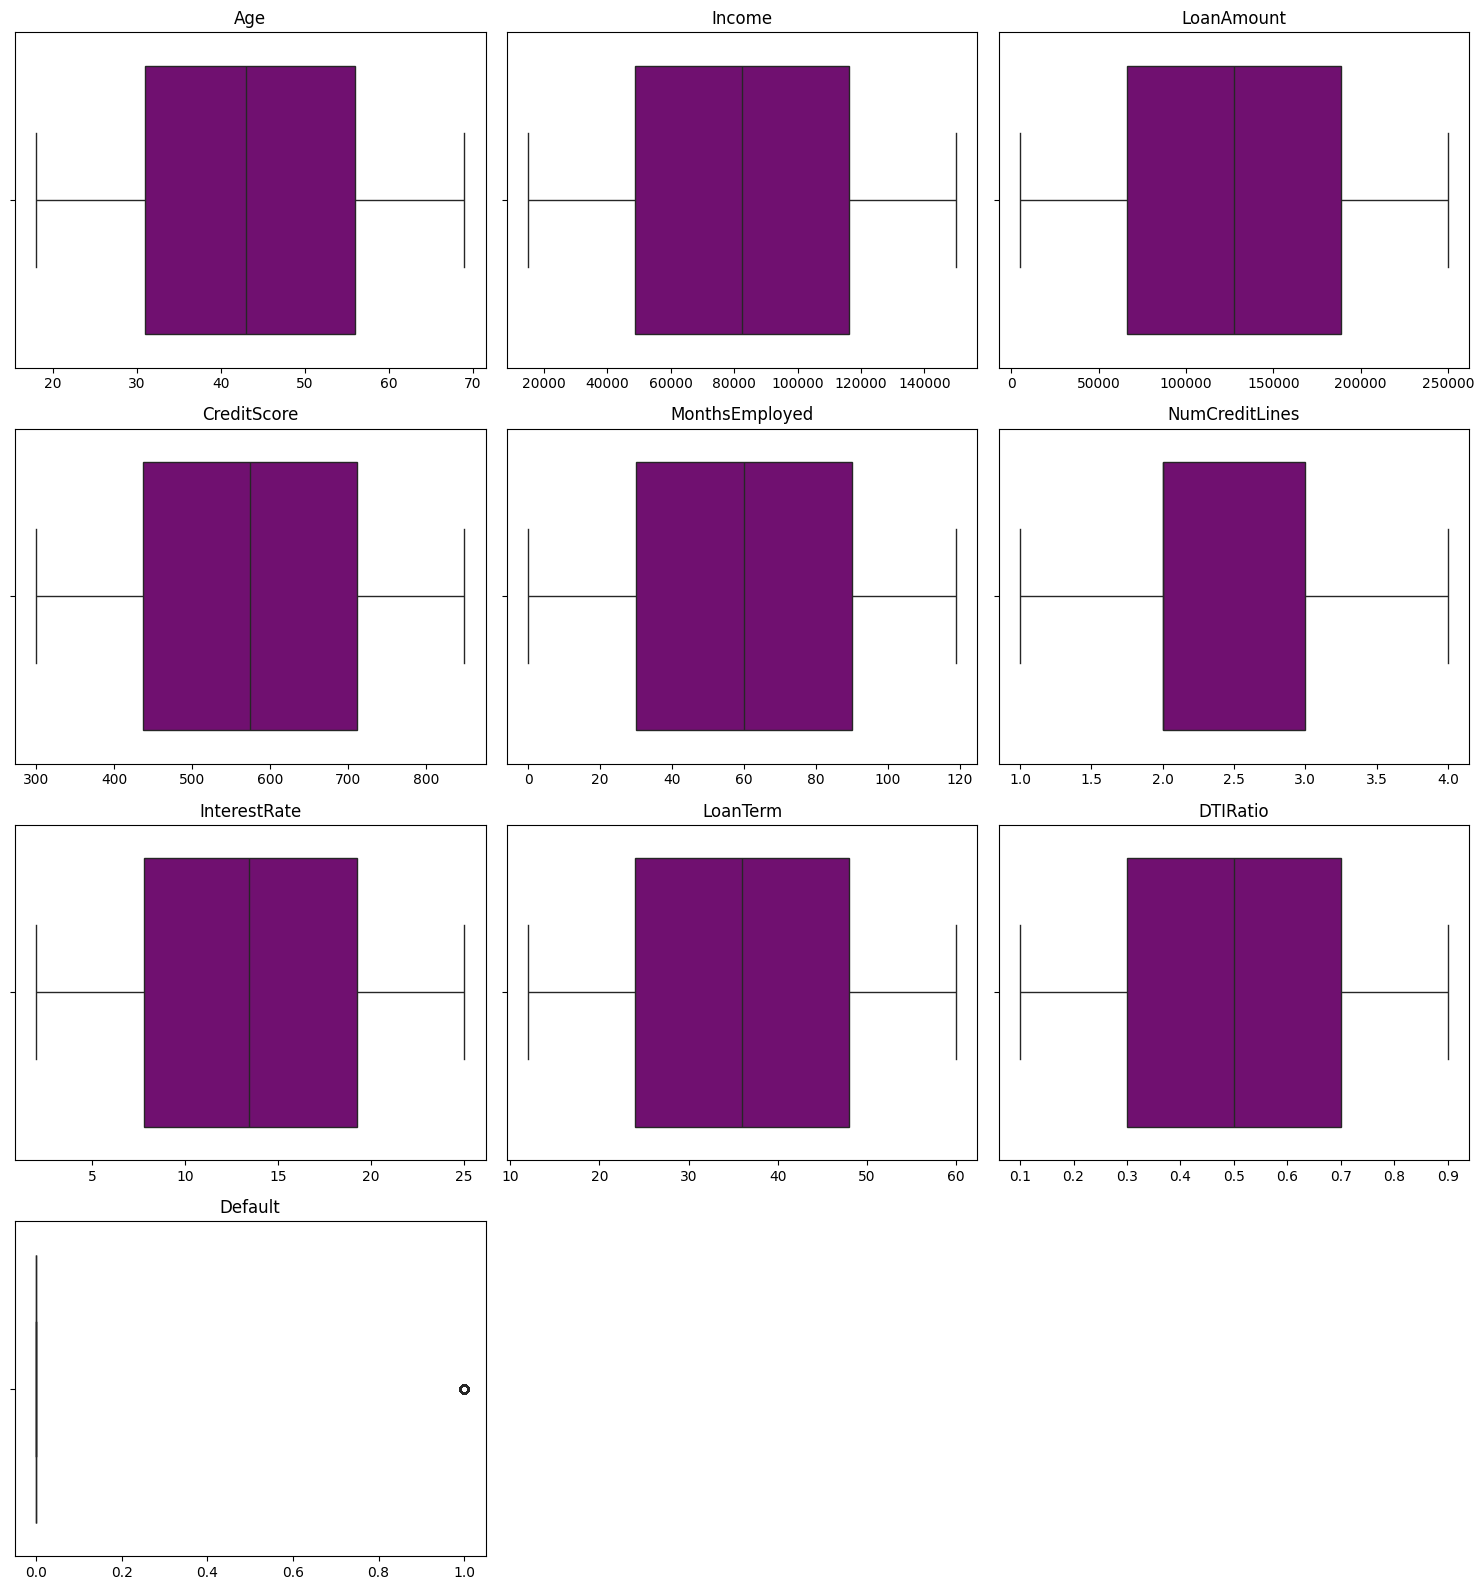

In [23]:
cols_numericas = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']
num_subplots = len(cols_numericas)
cols = 3 
rows = (num_subplots + cols - 1) // cols  

plt.figure(figsize=(15, 4 * rows))  
ind = 1
for col_num in cols_numericas:
    plt.subplot(rows, cols, ind)
    sns.boxplot(data=num_cols, x=col_num, color="purple")  
    plt.title(col_num)
    ind += 1
    plt.xlabel("")
plt.tight_layout()
plt.show()

**INFERENCIA**:
Observamos en base a nuestro grafico de boxplot que las distribuciones en las variables numericas se encuentran distribuidas de forma uniforme sin valores atipicos u outliers, por otro lado la distribucion dentro de NumCredLines nos indica que la cantidad de prestamos en las personas solamente varia entre 2 y 3, asi mismo que la variable Default que es nuestro target u objetivo es de clasificaion binaria.
Po otro lado las distribuciones intercuartilicas en las demas variables se encuentran distribuidas de forma uniforme es decir que estasn dentro de los valores intercuartilicos, por o cual concluimos que este Dataset esta listo para poder llevarlo a a escalar y procesar los datos. 

In [25]:
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


**MAPA DE CALOR (CORRELACIÓN ENTRE VARIABLES NUMERICAS)**

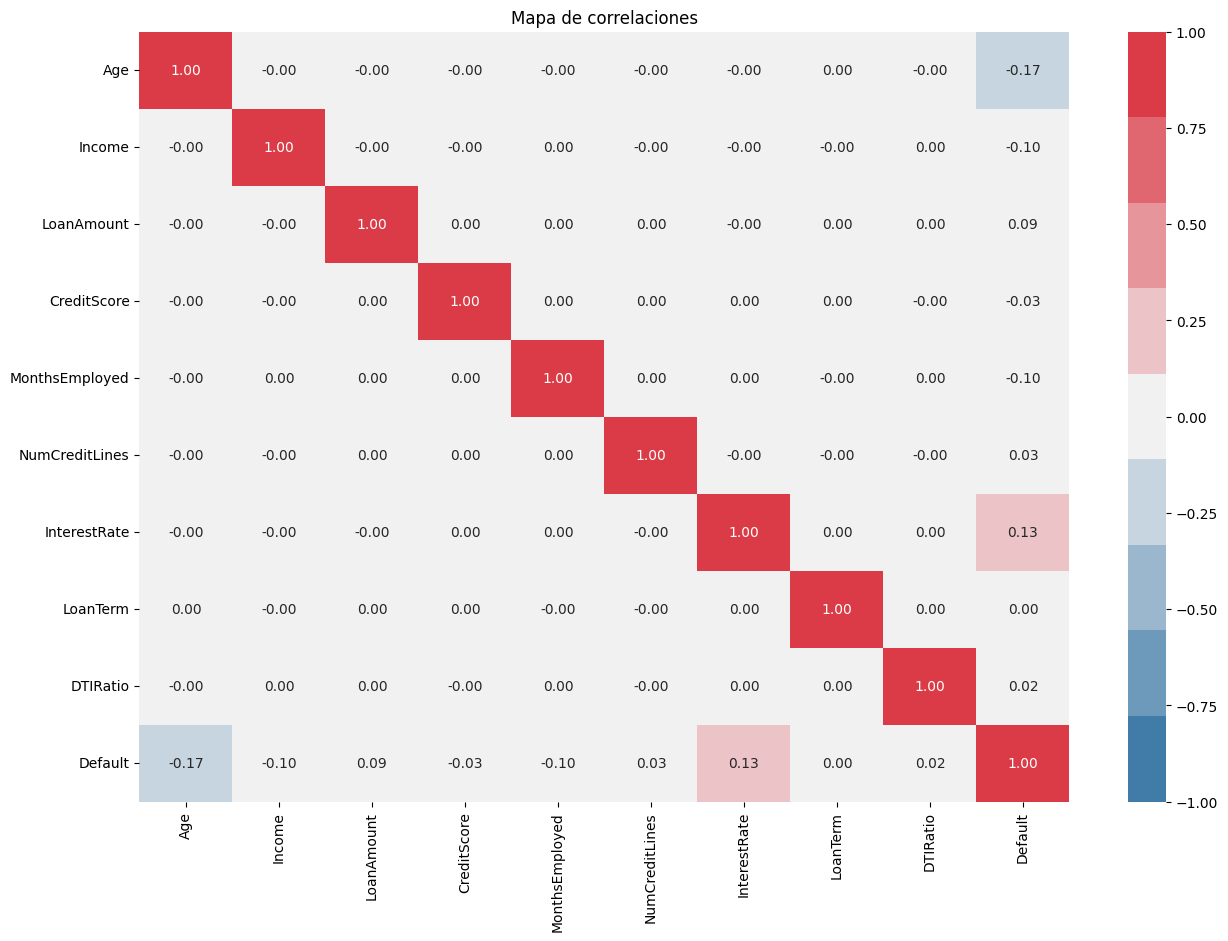

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(num_cols.corr(),annot=True,cmap=sns.diverging_palette(240,10,n=9),fmt=".2f",vmin=-1,vmax=1)
plt.title("Mapa de correlaciones")
plt.show()

**INFERENCIA**: En base al mapa de calor observamos que las variables numericas no poseen una correlacion significativamente positiva o negativa en relación a nuestro target que es Default. Lo cual me hace surgir la duda si esatas variables son significativas para considerarlas en el sistema de clasificación.
Por otro lado observo tambien lo siguiente:
* La variable InsterestRate es la unica que presenta una correlacion postitiva importante en relacion al target, la cual representa un 0.13 de correalcion con el target.
* Las variables age, Income,CreditScore, MonthsEmployed representa una correlación negativa con el target, sin embargo estas no son tan fuerte porque oscilan entre los valores de:
    * Age: -0.17
    * Income: -0.10
    * CreditScore: -0.03
    * MonthsEmployed: -0.10
        * Observando que la variable Age posee la mayor correlación negativa con el targeet por lo que podemos inferir que a medida que la persona va aumentando su edad, decide no sacar un prestamo.
        * Por otro lado, la variable Income(Ingresos) en relacion con el target tambien posee una correlacion negativa la cual asevrea que amedida que una persona a aumentando sus ingresos no decide pedir un prestamos. 

**VISUALIZACIÓN DEL DEFAULT DEL PRESTAMO**

In [32]:
num_cols['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17584\251765604.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Default",data=num_cols,ax=ax[1],palette=colores)


Cliente NO ABANDONA EL PAGO del prestamo(0): 225694
Cliente SI ABANDONA EL PAGO del prestamo(1): 29653


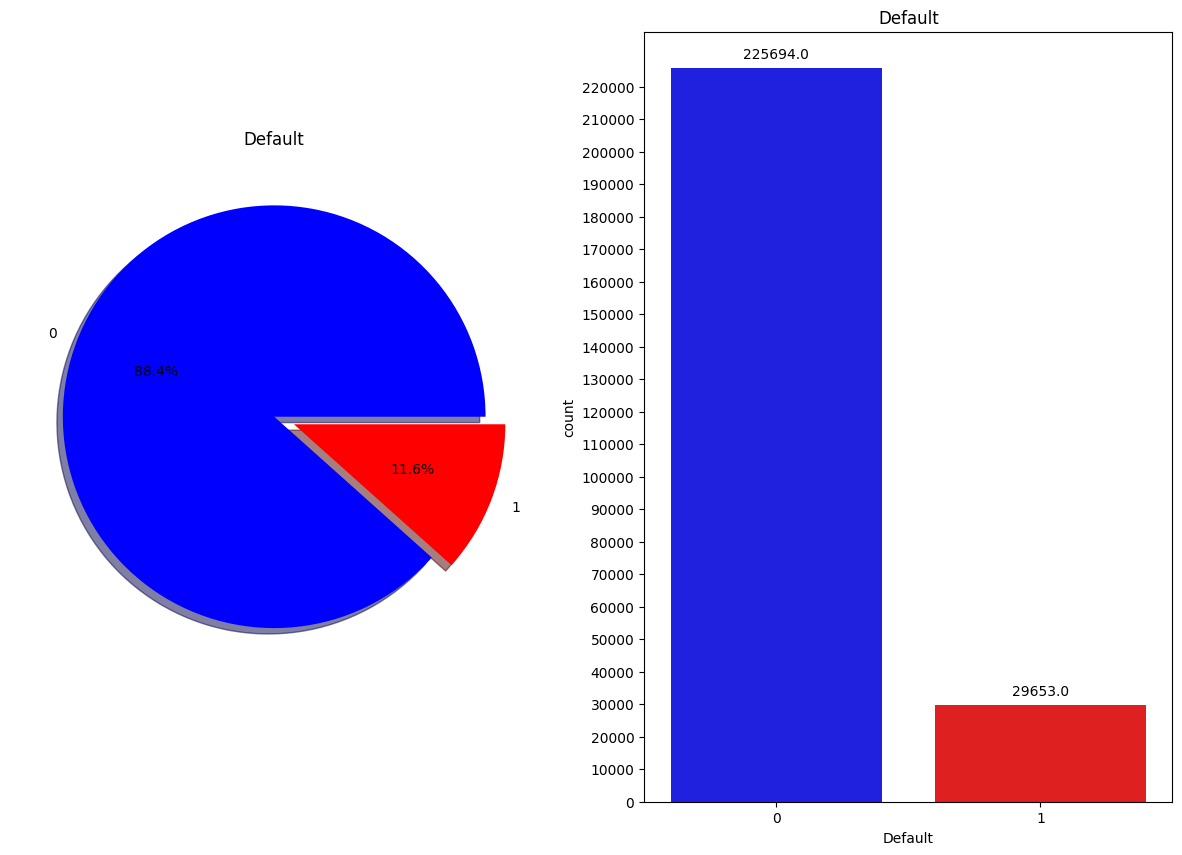

In [45]:
f,ax=plt.subplots(1,2,figsize=(15,10))
colores=['blue','red']
num_cols['Default'].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",ax=ax[0],shadow=True,colors=colores)
ax[0].set_title("Default")
ax[0].set_ylabel("")
sns.countplot(x="Default",data=num_cols,ax=ax[1],palette=colores)
ax[1].set_title("Default")
ax[1].set_yticks(range(0,230000,10000))
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), 
                       textcoords='offset points')
P,N=num_cols['Default'].value_counts()
print("Cliente NO ABANDONA EL PAGO del prestamo(0):",P)
print("Cliente SI ABANDONA EL PAGO del prestamo(1):",N)
plt.show()

**INFERENCIA**: 
En base a los graficos de pastel y el grafico de barra observamos lo siguiente:
* EL 88.4% de la poblacion de estudio representadas por un cantidad de 225694 personas son aquellos que cumplen con el pago de sus creditos en el banco.
* EL 11.65% de la población de estudio representadas por una cantidad de 29653 personas son catalogadas como personas deudores al banco, es decir que dejan de pagar los prestamos adquiridos en la institución finaciera.
* En conclusión podemos observar que existe una gran tasa positiva de pagos en la poblacion de estudio, asi mismo que solo el 11.6% de la poblacion representa un riesgo al momento de brindarles un prestamo.

**GRAFICO DE PREFERENCIA DE LA EDAD CON EL PROPOSITO DEL PRESTAMO**

In [56]:
edad_proposito = df.groupby("LoanPurpose")[["Age"]].mean().reset_index()
edad_proposito

,LoanPurpose,Age
0,Auto,43.546515
1,Business,43.405493
2,Education,43.429311
3,Home,43.484148
4,Other,43.627057


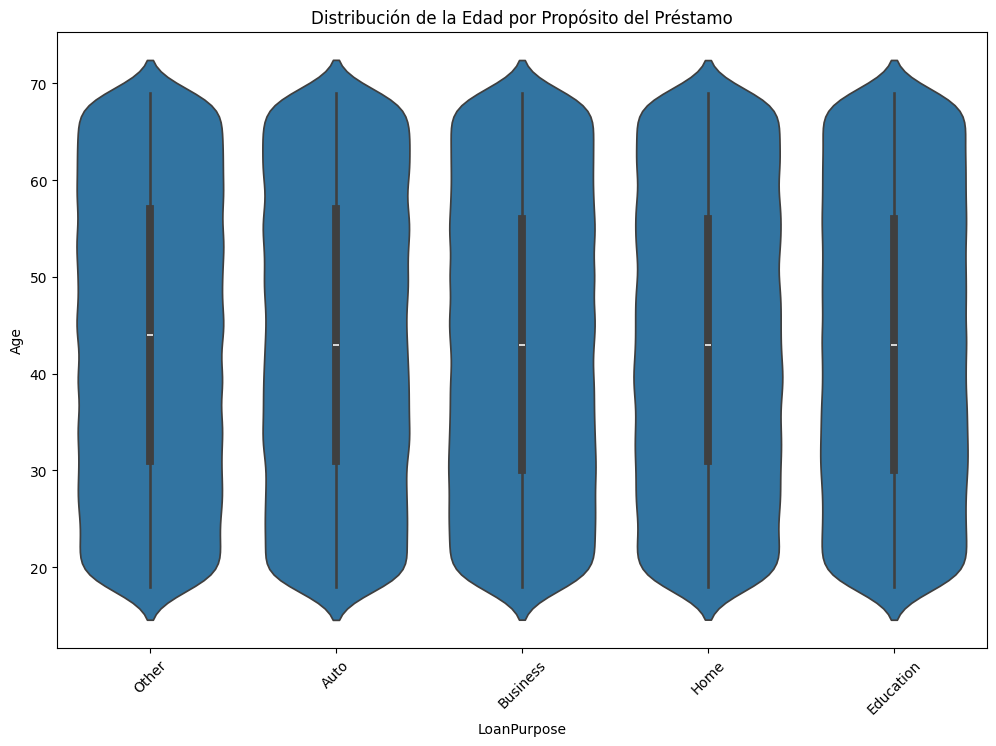

In [61]:
plt.figure(figsize=(12, 8))
sns.violinplot(x="LoanPurpose", y="Age", data=df)
plt.xticks(rotation=45)
plt.title("Distribución de la Edad por Propósito del Préstamo")
plt.show()

**INFERENCIA**:
* En abse al grafico de violin observamos que la preferencia de preatamoa en la institución son uniformes sin presentar sesgos ni preferencias en especifico por una categoria en especifico de prestamo.
* Asi mismo que el promedio de la edad en la  preferencia de cada prestamo se encuentra entre las edade superiores a 40 e inferiores a 50, tomando como valor promedio la edad de 43 años.

### **CONCLUSIONES FINALES DEL EDA**
* La población de estudio se encuentra uniformemente distribuida en cuanto al nivel de estudio alcanzado suprando la Educacion secundaria en adelante.
* Asi mismo también que la distribución de la preferencai de prestamo no esta sesgada en especifico a una categoria particular de prestamo, ya que estas se encuentran ligeramente distribuidas de forma uniforme, a lo que podemos concluir que seria recomendable poder distribuir adecuadamente el presupuesto de marketing para cada categoria de prestaño.
* Observamos que la tasa de pagos del credito financiero es positiva y que se cumplen con los pagos de forma adecuada, esta se ve representada por el 88.4% sin embargo la tasa de clientes que abandona el pago de sus cuotas es minima teniendo solo el 11.6%, asi mismo es de principal estudio esta parte de la poblacioón para poder gestionar de mejor manera el otorgamiento del credito.
* Por ultimo observamos que la preferencia del tipo de prestamo en base a la edad promedio tambien resulta ser uniforme, obtniendo como pórmedio de la edad para cada tipo de prestamo el valor de 43 años.

## **PREPROCESAMIENTO DE LOS DATOS**

In [67]:
y=df["Default"]
X=df.drop(columns=["LoanID","Default"],axis=1)

In [68]:
X.shape

(255347, 16)

In [69]:
y.shape

(255347,)

In [70]:
#librerias necesarias para el preprocesamiento
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import classification_report

In [71]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [72]:
one_hot_encoder = OneHotEncoder()
standard_scaler = StandardScaler()

In [73]:
imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

In [74]:
col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),
                                          (make_pipeline(imputer_cat,one_hot_encoder), cat_selector),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000014308FFEB40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001430C0B4B00>)])

In [75]:
col_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000014308FFEB40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001430C0B4B00>)])

In [76]:
aux=col_transformer.transform(X)
X_procesado=pd.DataFrame(aux,columns=col_transformer.get_feature_names_out())
X_procesado.info()
X_procesado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 31 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   pipeline-1__Age                           255347 non-null  float64
 1   pipeline-1__Income                        255347 non-null  float64
 2   pipeline-1__LoanAmount                    255347 non-null  float64
 3   pipeline-1__CreditScore                   255347 non-null  float64
 4   pipeline-1__MonthsEmployed                255347 non-null  float64
 5   pipeline-1__NumCreditLines                255347 non-null  float64
 6   pipeline-1__InterestRate                  255347 non-null  float64
 7   pipeline-1__LoanTerm                      255347 non-null  float64
 8   pipeline-1__DTIRatio                      255347 non-null  float64
 9   pipeline-2__Education_Bachelor's          255347 non-null  float64
 10  pipeline-2__Educatio

,pipeline-1__Age,pipeline-1__Income,pipeline-1__LoanAmount,pipeline-1__CreditScore,pipeline-1__MonthsEmployed,pipeline-1__NumCreditLines,pipeline-1__InterestRate,pipeline-1__LoanTerm,pipeline-1__DTIRatio,pipeline-2__Education_Bachelor's,...,pipeline-2__HasMortgage_Yes,pipeline-2__HasDependents_No,pipeline-2__HasDependents_Yes,pipeline-2__LoanPurpose_Auto,pipeline-2__LoanPurpose_Business,pipeline-2__LoanPurpose_Education,pipeline-2__LoanPurpose_Home,pipeline-2__LoanPurpose_Other,pipeline-2__HasCoSigner_No,pipeline-2__HasCoSigner_Yes
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,-1.634285,-1.142632,1.173101,-0.209337,1.427636,1.341937,0.093006,-1.415845,1.514783,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
255343,-0.767053,-0.783984,0.879724,-0.398130,-1.314597,-0.448549,-0.292744,-0.708685,-1.256785,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
255344,0.833990,0.059562,1.139391,0.143078,0.301877,0.446694,-1.236022,1.412793,-0.000918,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
255345,-0.099952,0.066979,-0.945840,1.477221,-0.564091,-1.343791,1.116146,0.705634,-0.260753,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


**DIVISION DEL DATA SET EN TRAIN-TEST-SPLIT**

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_procesado, y, test_size=0.3,random_state=23)

In [78]:
X_train.shape,y_train.shape

((178742, 31), (178742,))

In [79]:
X_test.shape,y_test.shape

((76605, 31), (76605,))

### **MACHINE LEARNING SIN PCA**

**DECISION TREE CLASSIFIER**

In [90]:
#validacion crzada de 5 pliegues
kf = KFold(n_splits=5, shuffle=True, random_state=23)

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [92]:
#validacion crzada de 5 pliegues
kf = KFold(n_splits=5, shuffle=True, random_state=23)
dt_classifier= DecisionTreeClassifier(  criterion='gini', 
                                        max_depth=3, 
                                        min_samples_split=2, 
                                        min_samples_leaf=1, 
                                        max_features=None, 
                                        random_state=42)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [93]:
dt_predict=dt_classifier.predict(X_test)
print(classification_report(y_test,dt_predict))
print("Accuracy of Decision Tree Classifier is : ",accuracy_score(y_test,dt_predict)*100)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     67662
           1       0.00      0.00      0.00      8943

    accuracy                           0.88     76605
   macro avg       0.44      0.50      0.47     76605
weighted avg       0.78      0.88      0.83     76605

Accuracy of Decision Tree Classifier is :  88.32582729586842


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

**RANDOM FOREST CLASIFFIER**

In [84]:
rf_classifier = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=100,random_state=42)
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=kf,scoring="accuracy")

In [95]:
rf_classifier.fit(X_train,y_train)
rf_predict =rf_classifier.predict(X_test)
print(classification_report(y_test,rf_predict))
print("Accuracy of Random Forest is : ",accuracy_score(y_test,rf_predict)*100)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67662
           1       0.62      0.03      0.06      8943

    accuracy                           0.88     76605
   macro avg       0.75      0.51      0.50     76605
weighted avg       0.86      0.88      0.84     76605

Accuracy of Random Forest is :  88.47072645388681


**KNNEIGHBOURS**

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [103]:
knnpredict=knn.predict(X_test)
print(classification_report(y_test,knnpredict))
print("Accuracy of KNN is : ",accuracy_score(y_test,knnpredict)*100)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67662
           1       0.39      0.03      0.06      8943

    accuracy                           0.88     76605
   macro avg       0.64      0.51      0.50     76605
weighted avg       0.83      0.88      0.83     76605

Accuracy of KNN is :  88.12218523595065


**ELECCIÓN DEL MEJOR MODELO DE CLASIFICACIÓN EN MACHINE LEARNING**

In [104]:
modelos=pd.DataFrame({
    'Modelos':['Decision_Tree','K Neighbors','Random_Forest'],
    'Scores':[dt_classifier.score(X_test, y_test)*100,
              knn.score(X_test,y_test)*100,
              rf_classifier.score(X_test,y_test)*100]})
modelos.sort_values(by='Scores',ascending=False)

,Modelos,Scores
2,Random_Forest,88.470726
0,Decision_Tree,88.325827
1,K Neighbors,88.122185


**CONCLUSIÓN**:

* *En base a los 3 modelos de clasificación propuestos para la eleccion del mejor modelo, observamos que el modelo de clasificacion binarai que mejor se ajusta al modelo es el de Random_Forest en comparación a los otros 2 modelos restantes que son el de Decisión Tree Classifier y el modelo de KNeighbours.*
* *Los modelos evaluados aqui se trabajaron sin PCA y el rendimiento que presentan son casi parejos lo cual me hace concluir que dede de aplicarse PCA para poder obtner un mejor rendimiento de los modelos.*
* *Otra observacion que puedo tomar en cuenta es que la daa se encuntrra en cierta medida distribuida de forma uniforme o que los mismos datos no permiten un mejor estudio del problema ya que como vimos en el mapa de calor, no existia correlaciones significativas entre las variables numericas con referencia al target.*
* ***En  conclusión**: El modelo que posee mas puntaje de rendimiento ligeramente superior es el de RAndom Forest, sin embargo se sugiere probar con nuevos parametros en cada modelo para optimizar el rendimiento*

### **MACHINE LEARNING CON PCA**

In [106]:
from sklearn.decomposition import PCA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


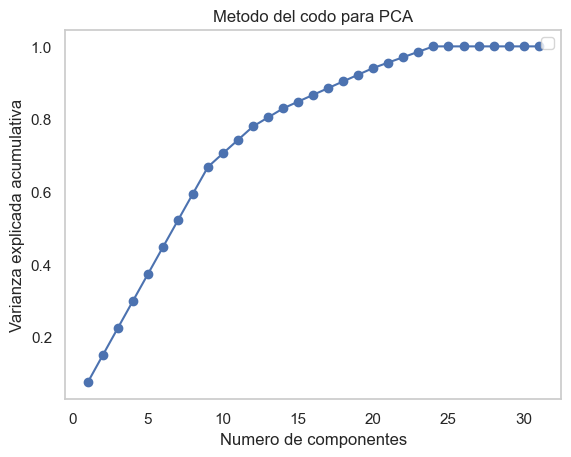

In [107]:
variance_explained=[]
for n_components in range(1,32):
  pca=PCA(n_components=n_components)
  pca.fit(X_train)
  variance_explained.append(sum(pca.explained_variance_ratio_))

plt.plot(range(1,32),variance_explained, marker="o", linestyle="-")
plt.title("Metodo del codo para PCA")
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza explicada acumulativa")
plt.grid()
plt.legend()
plt.show()